# Instalando e Importando bibliotecas

###  Instalação de bibliotecas (caso necessário)

In [1]:
#!pip install geopandas
#!pip install unidecode

In [2]:
import numpy as np
import pandas as pd
import geopandas
%matplotlib inline
%config Completer.use_jedi = False

# PARTE 1 - DADOS COVID19 POR BAIRRO

# Carregando dados covid

In [3]:
# encoding = 'cp1252' é equivalente ao ANSI
dados = pd.read_csv('https://bi.s3.es.gov.br/covid19/MICRODADOS.zip', sep = ';', encoding = 'cp1252')
dados.head(10)

,DataNotificacao,DataCadastro,DataDiagnostico,DataColeta_RT_PCR,DataColetaTesteRapido,DataColetaSorologia,DataColetaSorologiaIGG,DataEncerramento,DataObito,Classificacao,...,ViagemBrasil,ViagemInternacional,ProfissionalSaude,PossuiDeficiencia,MoradorDeRua,ResultadoRT_PCR,ResultadoTesteRapido,ResultadoSorologia,ResultadoSorologia_IGG,TipoTesteRapido
0,2021-05-23,2021-05-22,2021-05-19,2021-05-23,NaN,NaN,NaN,2021-05-23,NaN,Suspeito,...,Não Informado,Não Informado,Não,Não,Não,Inconclusivo,Não Informado,Não Informado,Não Informado,Não Informado
1,2021-05-23,2021-03-30,2021-05-20,NaN,2021-05-23,NaN,NaN,2021-04-05,NaN,Suspeito,...,Não,Não,Não,Não,Não,Não Informado,Negativo,Não Informado,Não Informado,Teste rápido Antígeno
2,2021-05-23,2021-05-22,2021-05-19,2021-05-23,NaN,NaN,NaN,2021-05-23,NaN,Suspeito,...,Não Informado,Não Informado,Não,Não,Não,Inconclusivo,Não Informado,Não Informado,Não Informado,Não Informado
3,2021-05-23,2021-01-07,2021-05-21,NaN,2021-05-23,NaN,NaN,2021-02-24,NaN,Suspeito,...,Não,Não,Sim,Não,Não,Não Informado,Negativo,Não Informado,Não Informado,Teste rápido Antígeno
4,2021-05-23,2021-05-23,2021-05-20,2021-05-23,2021-05-23,NaN,NaN,NaN,NaN,Suspeito,...,Não Informado,Não Informado,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não Informado,Teste rápido Antígeno
5,2021-05-23,2021-04-28,2021-05-21,2021-04-29,2021-05-23,NaN,NaN,2021-05-03,NaN,Descartados,...,Não,Ignorado,Não,Não,Não,Negativo,Negativo,Não Informado,Não Informado,Teste rápido Antígeno
6,2021-05-23,2021-05-23,2021-05-16,2021-05-23,NaN,NaN,NaN,NaN,NaN,Suspeito,...,Não Informado,Não Informado,Não,Não,Não,Não Informado,Não Informado,Não Informado,Não Informado,Não Informado
7,2021-05-23,2021-05-22,2021-05-18,2021-05-23,NaN,NaN,NaN,2021-05-23,NaN,Suspeito,...,Não Informado,Não Informado,Não,Não,Sim,Inconclusivo,Não Informado,Não Informado,Não Informado,Não Informado
8,2021-05-23,2021-05-23,2021-05-20,2021-05-23,NaN,NaN,NaN,NaN,NaN,Suspeito,...,Não,Não,Não,Não,Não,Inconclusivo,Não Informado,Não Informado,Não Informado,Não Informado
9,2021-05-23,2021-05-23,2021-05-20,NaN,2021-05-23,NaN,NaN,NaN,NaN,Suspeito,...,Não,Não,Não,Não,Não,Não Informado,Negativo,Não Informado,Não Informado,Teste rápido Antígeno


# Obtendo informações sobre os dados

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1435266 entries, 0 to 1435265
Data columns (total 45 columns):
 #   Column                   Non-Null Count    Dtype 
---  ------                   --------------    ----- 
 0   DataNotificacao          1435266 non-null  object
 1   DataCadastro             1435266 non-null  object
 2   DataDiagnostico          1435266 non-null  object
 3   DataColeta_RT_PCR        715928 non-null   object
 4   DataColetaTesteRapido    475442 non-null   object
 5   DataColetaSorologia      82154 non-null    object
 6   DataColetaSorologiaIGG   127633 non-null   object
 7   DataEncerramento         1227168 non-null  object
 8   DataObito                13451 non-null    object
 9   Classificacao            1435266 non-null  object
 10  Evolucao                 1435266 non-null  object
 11  CriterioConfirmacao      1435266 non-null  object
 12  StatusNotificacao        1435266 non-null  object
 13  Municipio                1435266 non-null  object
 14  Ba

# Agrupando os dados por evolução

Nosso interesse esta na classe de "Óbito pelo COVID-19"

In [5]:
dados.groupby(by='Evolucao').count()

,DataNotificacao,DataCadastro,DataDiagnostico,DataColeta_RT_PCR,DataColetaTesteRapido,DataColetaSorologia,DataColetaSorologiaIGG,DataEncerramento,DataObito,Classificacao,...,ViagemBrasil,ViagemInternacional,ProfissionalSaude,PossuiDeficiencia,MoradorDeRua,ResultadoRT_PCR,ResultadoTesteRapido,ResultadoSorologia,ResultadoSorologia_IGG,TipoTesteRapido
Evolucao,,,,,,,,,,,,,,,,,,,,,
-,277457,277457,277457,121181,69358,7801,17613,91518,11,277457,...,277457,277457,277457,277457,277457,277457,277457,277457,277457,277457
Cura,444063,444063,444063,260721,160903,38064,45659,443008,16,444063,...,444063,444063,444063,444063,444063,444063,444063,444063,444063,444063
Ignorado,700106,700106,700106,323675,238685,35652,63752,679023,52,700106,...,700106,700106,700106,700106,700106,700106,700106,700106,700106,700106
Óbito pelo COVID-19,10512,10512,10512,7817,5252,526,500,10512,10512,10512,...,10512,10512,10512,10512,10512,10512,10512,10512,10512,10512
Óbito por outras causas,3128,3128,3128,2534,1244,111,109,3107,2860,3128,...,3128,3128,3128,3128,3128,3128,3128,3128,3128,3128


### Tratamento de nulos onde trataremos bairros, municipios e outros valores 'Nan'

In [6]:
covid = dados[dados['Evolucao']=='Óbito pelo COVID-19']
#covid['Bairro'] = covid['Bairro'].fillna('Bairro nao Informado')
covid['Bairro'].fillna('Bairro nao Informado',inplace=True)
#covid['Municipio'] = covid['Municipio'].fillna('Municipio nao Informado')
covid['Municipio'].fillna('Municipio nao Informado',inplace=True)
covid = covid.fillna(0)
covid_bairro = covid.groupby(by=['Municipio','Bairro']).count()
covid_bairro.reset_index(inplace=True)
covid_bairro_ordenado = covid_bairro.sort_values(by='Evolucao',ascending=False)
covid_bairro_ordenado = covid_bairro_ordenado[['Municipio','Bairro','Evolucao']]
covid_bairro_ordenado.head()


/home/msonl2/.local/lib/python3.6/site-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,Municipio,Bairro,Evolucao
1787,VILA VELHA,PRAIA DA COSTA,135
1854,VITORIA,JARDIM CAMBURI,107
1855,VITORIA,JARDIM DA PENHA,90
371,CARIACICA,ALTO LAGE,73
1762,VILA VELHA,ITAPOÃ,72


# verificando a quantidade de registros obtidos
### (deve coincidir com o grupo desejado)

In [7]:
covid_bairro_ordenado['Evolucao'].sum()

10512

### Renomear atributo para qtd_obitos

In [8]:
covid_bairro_ordenado.columns=['Municipio','Bairro','qtd_obitos']
covid_bairro_ordenado.head()

,Municipio,Bairro,qtd_obitos
1787,VILA VELHA,PRAIA DA COSTA,135
1854,VITORIA,JARDIM CAMBURI,107
1855,VITORIA,JARDIM DA PENHA,90
371,CARIACICA,ALTO LAGE,73
1762,VILA VELHA,ITAPOÃ,72


# PARTE 2 - DADOS SHAPEFILE BAIRROS

# Obtendo shapefile para realizar junção do conjunto de dados

### Transformando objeto pandas dataframe para Geopandas

In [10]:
# Definindo caminho do arquivo
shp_path = "shapefiles/ijsn/ijsn_bairros_2019/ijsn_bairros.shp"
# Lendo arquivo com geopandas
data_shape = geopandas.read_file(shp_path,encoding = 'UTF-8')
data_shape.head()
df_geo = pd.DataFrame(data_shape)

In [11]:
### Redefinindo nomes e agrupando por municipios e bairros

In [12]:
df_geo.columns = ['fid', 'objectid', 'nome_bairro_geo', 'municipio_geo', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry']
df_geo = df_geo[['fid', 'objectid', 'nome_bairro_geo', 'municipio_geo','geometry']]
df_geo

,fid,objectid,nome_bairro_geo,municipio_geo,geometry
0,1.0,1084.0,CRICARÉ,SÃO MATEUS,"POLYGON ((407701.263 7930733.091, 407706.274 7..."
1,2.0,1085.0,DOM JOSÉ DALVIT,SÃO MATEUS,"POLYGON ((408914.302 7929814.325, 408913.400 7..."
2,3.0,393.0,SÃO JUDAS TADEU,COLATINA,"POLYGON ((330150.525 7839435.117, 330158.180 7..."
3,4.0,355.0,ALTO VILA NOVA,COLATINA,"POLYGON ((328717.647 7838480.825, 328693.420 7..."
4,5.0,436.0,FÁTIMA,ARACRUZ,"POLYGON ((367507.672 7806237.261, 367468.990 7..."
...,...,...,...,...,...
1382,1383.0,551.0,GUMERCINDO DA SILVA GLÓRIA,GUAÇUÍ,"POLYGON ((221706.909 7701752.942, 221814.984 7..."
1383,1384.0,552.0,SÃO MIGUEL,GUAÇUÍ,"POLYGON ((221557.759 7701435.354, 221562.702 7..."
1384,1385.0,553.0,TANCREDO NEVES,GUAÇUÍ,"POLYGON ((222088.287 7702004.876, 222064.187 7..."
1385,1386.0,555.0,BELA VISTA,IBATIBA,"POLYGON ((237050.531 7760311.853, 237053.345 7..."


# PARTE 3 - JUNCAO DOS DATAFRAMES E CRIAÇÃO DO NOVO SHAPEFILE

### Verificando duplicados

In [13]:
df_geo[df_geo.duplicated(keep=False)]

,fid,objectid,nome_bairro_geo,municipio_geo,geometry


### Verificando duplicados

In [14]:
covid_bairro_ordenado[covid_bairro_ordenado.duplicated(keep=False)]

,Municipio,Bairro,qtd_obitos


### Criando unção para remover acentos
fonte: https://wiki.python.org.br/RemovedorDeAcentos

In [15]:
from unicodedata import normalize

def remover_acentos(txt):
    return normalize('NFKD', txt).encode('ASCII', 'ignore').decode('ASCII')

# Tratando acentos obtidos no shapefile de bairros

In [16]:
df_geo['nome_bairro_geo'].fillna('Bairro nao Informado',inplace=True)
df_geo['municipio_geo']= df_geo.municipio_geo.apply(remover_acentos)
df_geo['nome_bairro_geo']= df_geo.nome_bairro_geo.apply(remover_acentos)

# Tratando acentos obtidos no arquivo CSV Covid19 

In [17]:
covid_bairro_ordenado['Bairro'].fillna('Bairro nao Informado',inplace=True)
covid_bairro_ordenado['Municipio']= covid_bairro_ordenado.Municipio.apply(remover_acentos)
covid_bairro_ordenado['Bairro']= covid_bairro_ordenado.Bairro.apply(remover_acentos)

## Tamanho dos conjuntos de dados

In [18]:
print("Bairros obtidos do shapefile:",len(df_geo))
print("Bairros obtidos do CSV:",len(covid_bairro_ordenado))

Bairros obtidos do shapefile: 1387
Bairros obtidos do CSV: 1896


==> Sendo assim, observe que existem conjuntos de dados que nã estarão presentes nos dois conjuntos de dados ao mesmo tempo.

# Realizando junção dos dois conjuntos de dados

In [19]:
df_covid_por_bairro = df_geo.merge(covid_bairro_ordenado, 
                      left_on=['municipio_geo','nome_bairro_geo'], right_on = ['Municipio', 'Bairro'], 
                      how='inner')

In [20]:
df_covid_por_bairro.head()

,fid,objectid,nome_bairro_geo,municipio_geo,geometry,Municipio,Bairro,qtd_obitos
0,1.0,1084.0,CRICARE,SAO MATEUS,"POLYGON ((407701.263 7930733.091, 407706.274 7...",SAO MATEUS,CRICARE,1
1,3.0,393.0,SAO JUDAS TADEU,COLATINA,"POLYGON ((330150.525 7839435.117, 330158.180 7...",COLATINA,SAO JUDAS TADEU,4
2,5.0,436.0,FATIMA,ARACRUZ,"POLYGON ((367507.672 7806237.261, 367468.990 7...",ARACRUZ,FATIMA,9
3,11.0,1064.0,SAO SEBASTIAO DO MEIO,SANTA MARIA DE JETIBA,"POLYGON ((316613.161 7784750.368, 316610.428 7...",SANTA MARIA DE JETIBA,SAO SEBASTIAO DO MEIO,5
4,16.0,379.0,ESPLANADA,COLATINA,"POLYGON ((328865.577 7838838.651, 328852.575 7...",COLATINA,ESPLANADA,1


In [21]:
gdf = geopandas.GeoDataFrame(
    df_covid_por_bairro[['fid', 'objectid', 'geometry',
       'Municipio', 'Bairro', 'qtd_obitos']])
type(gdf)

geopandas.geodataframe.GeoDataFrame

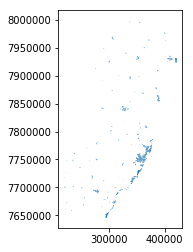

In [22]:
gdf.plot()

# Definindo Projeção dos dados obtidos ao shapefile a ser criado

In [23]:
from pyproj import CRS
gdf.crs  = CRS(31984)
gdf.crs

<Projected CRS: EPSG:31984>
Name: SIRGAS 2000 / UTM zone 24S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 42°W and 36°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-42.0, -26.35, -36.0, 0.74)
Coordinate Operation:
- name: UTM zone 24S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

# Reprojetando dados para o shapefile a ser criado
#### (EPSG:32724 - WGS 84 / UTM zone 24S - Projetadom)

In [24]:
out_new_crs = epsg=32724
new_gdf = gdf.to_crs(out_new_crs) 
new_gdf.crs

<Projected CRS: EPSG:32724>
Name: WGS 84 / UTM zone 24S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 42°W and 36°W, southern hemisphere between 80°S and equator, onshore and offshore. Brazil. South Georgia and the South Sandwich Islands.
- bounds: (-42.0, -80.0, -36.0, 0.0)
Coordinate Operation:
- name: UTM zone 24S
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Escrevendo o Shapefile de resultado 

In [25]:
out = r"generate_shapes_covid/obitos_bairro_covid.shp"
new_gdf.to_file(out)

In [26]:
!ls "generate_shapes_covid/"

obitos_bairro_covid.cpg  obitos_bairro_covid.prj  obitos_bairro_covid.shx
obitos_bairro_covid.dbf  obitos_bairro_covid.shp


 # References
    Dados shapefile bairros ES
    https://ide.geobases.es.gov.br/layers/geonode:ijsn_bairros/metadata_detail